1. Importing modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("RdBu")

In [2]:
data = pd.read_csv("../data/Student_Performance.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [4]:
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [5]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [6]:
data.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [7]:
data.shape

(10000, 6)

In [8]:
data.duplicated().any()

np.True_

In [9]:
data.describe(include = object)

,Extracurricular Activities
count,10000
unique,2
top,No
freq,5052


2. Visualizations

In [10]:
def count_plot(column_name, hue = None, rotation = 0):
    graph = sns.countplot(x = column_name, data = data, hue = hue, order = data[column_name].value_counts().index)
    for container in graph.containers:
        graph.bar_label(container)
    plt.xticks(rotation = rotation)
    plt.show()

In [11]:
def box_plot(x_axis = None, y_axis = None, hue = None, col = None):
    sns.catplot(x = x_axis, y = y_axis, data = data, hue = hue, kind = "box", col = col)
    plt.xlabel(x_axis)
    plt.ylabel("FRQ")
    plt.show()

Hours studied column

In [12]:
data["Hours Studied"].unique()

array([7, 4, 8, 5, 3, 6, 2, 1, 9])

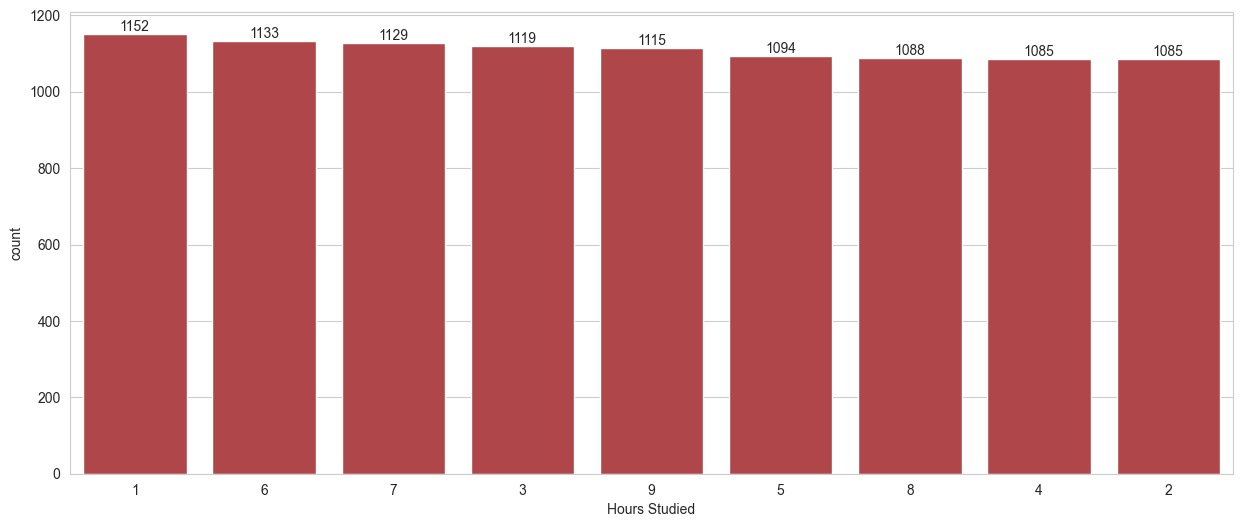

In [13]:
plt.figure(figsize = (15,6))
count_plot(column_name = "Hours Studied") 

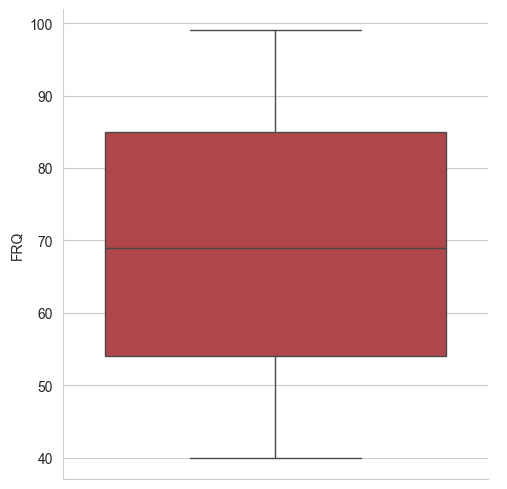

In [14]:
box_plot(y_axis = "Previous Scores")

discovering extra curricular activities column

In [15]:
data["Extracurricular Activities"].unique()

array(['Yes', 'No'], dtype=object)

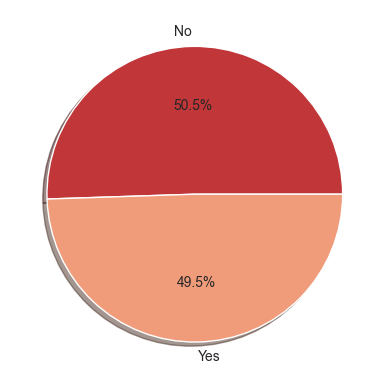

In [16]:
plt.pie(data["Extracurricular Activities"].value_counts(), labels = data["Extracurricular Activities"].value_counts().index, 
        shadow = True, autopct = "%1.1f%%")
plt.show()

sleep hours column

In [17]:
data["Sleep Hours"].unique()

array([9, 4, 7, 5, 8, 6])

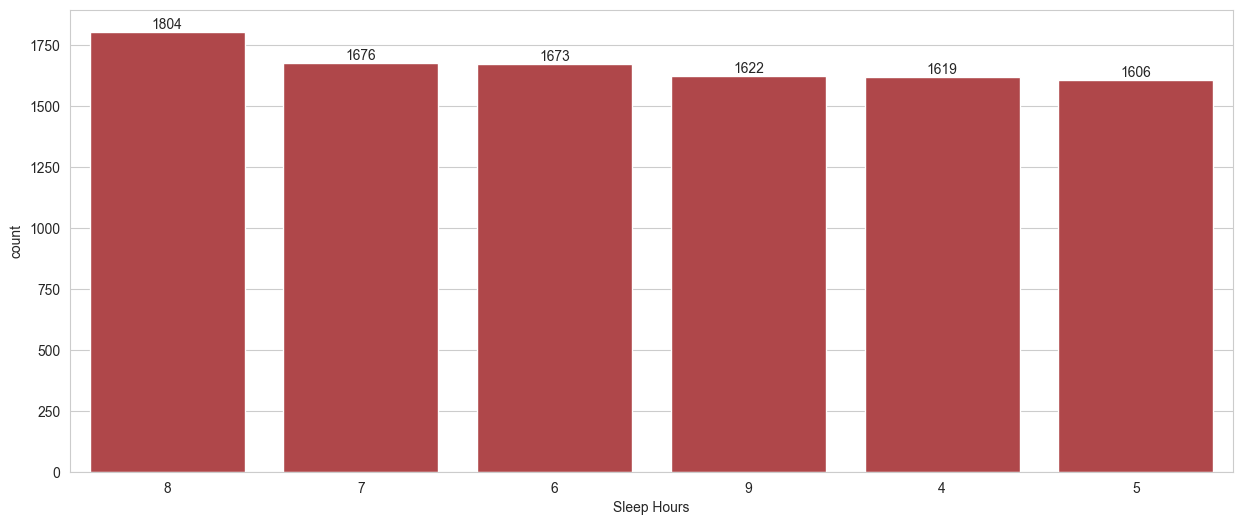

In [18]:
plt.figure(figsize = (15,6))
count_plot(column_name = "Sleep Hours")

sample question papers predicted column

In [19]:
data["Sample Question Papers Practiced"].unique()

array([1, 2, 5, 6, 0, 8, 3, 4, 9, 7])

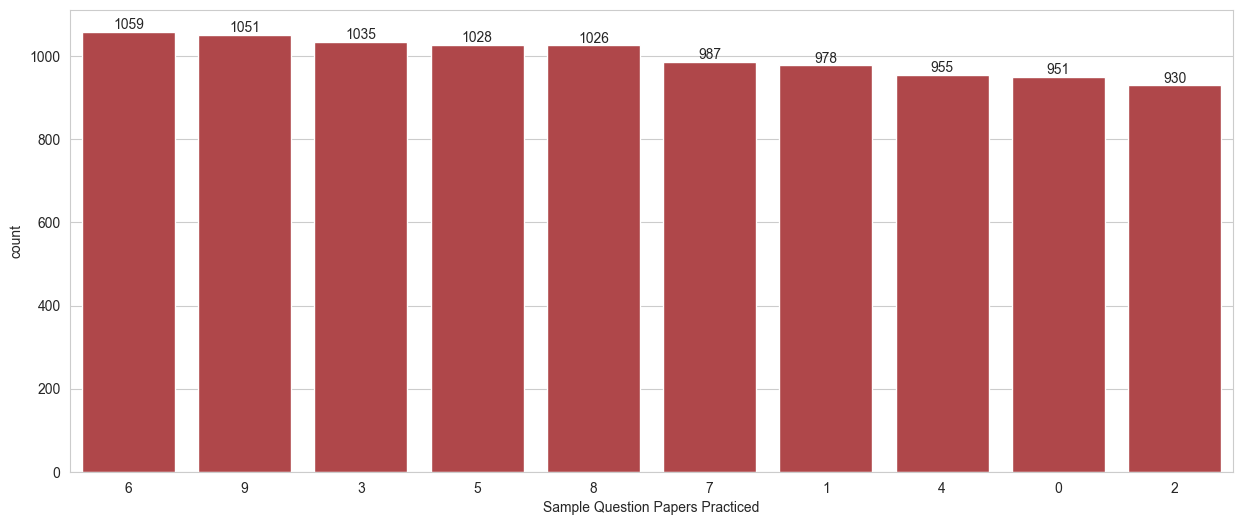

In [20]:
plt.figure(figsize = (15,6))
count_plot(column_name = "Sample Question Papers Practiced")

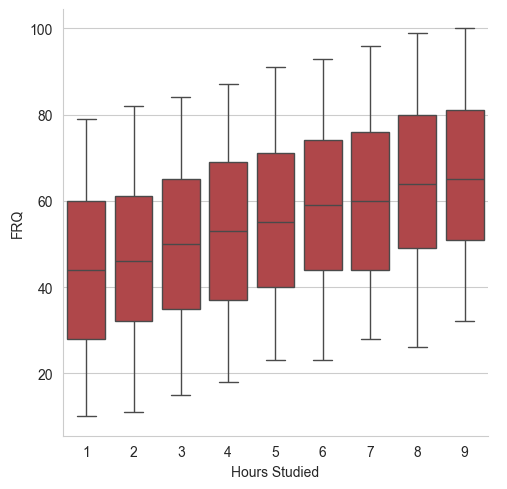

In [21]:
box_plot(x_axis = "Hours Studied", y_axis = "Performance Index")

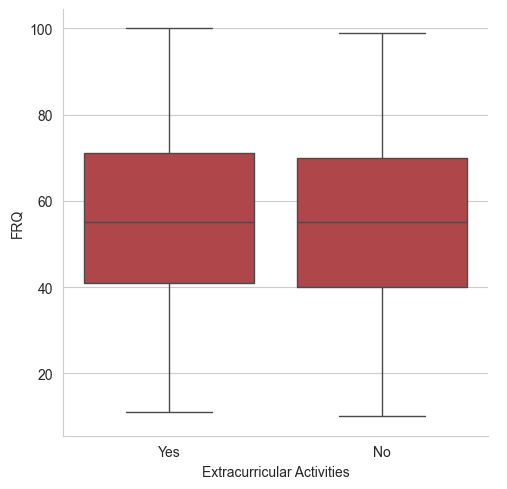

In [22]:
box_plot(x_axis = "Extracurricular Activities", y_axis = "Performance Index")

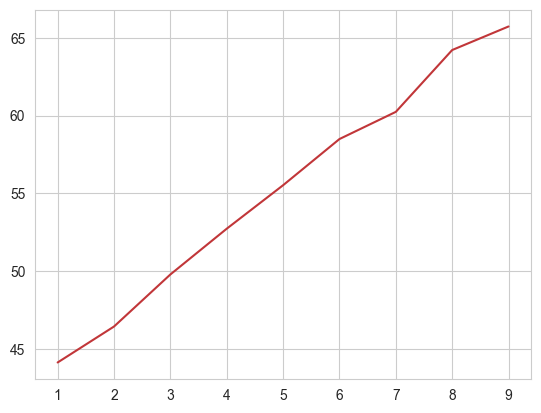

In [23]:
avg_performance_by_hours = data.groupby('Hours Studied')['Performance Index'].mean()
plt.plot(avg_performance_by_hours.index, avg_performance_by_hours.values)
plt.show()

heatmap for correlation

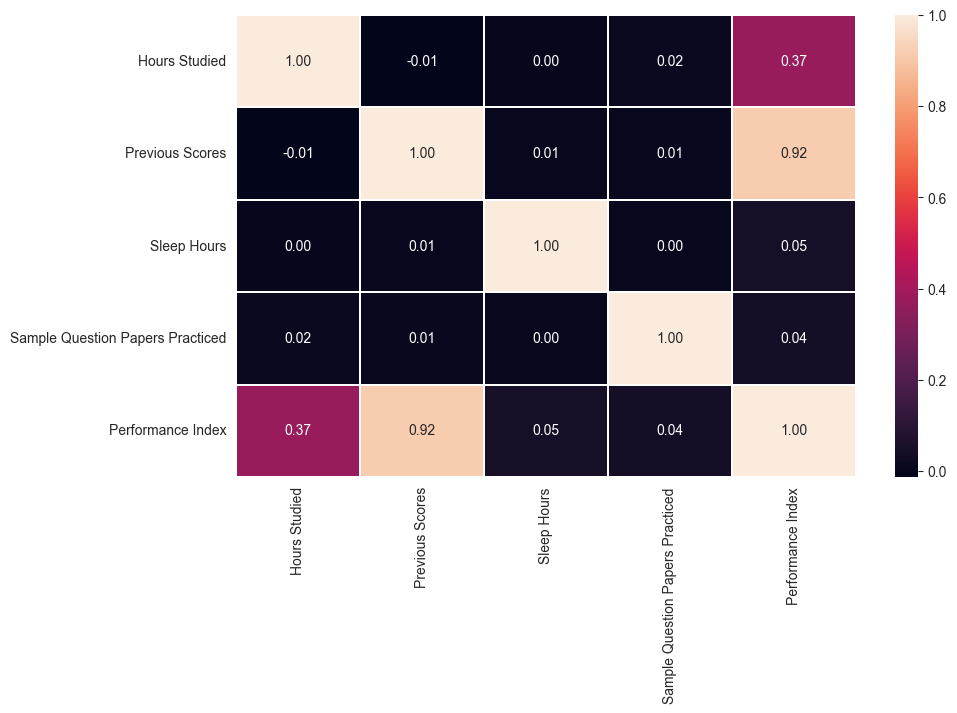

In [24]:
plt.figure(figsize = (10,6))
sns.heatmap(data.select_dtypes(exclude = object).corr(), annot = True, fmt = ".2f", linewidths = 0.2)
plt.show()

3. data preprocessing

In [25]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score

In [26]:
encoder = LabelEncoder()
data["Extracurricular Activities"] =  encoder.fit_transform(data["Extracurricular Activities"])

In [27]:
data.sample(2)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
7640,2,74,1,6,8,49.0
2584,6,75,0,7,2,63.0


In [28]:
x = data.drop(columns = "Performance Index")
y = data["Performance Index"]

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [30]:
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (8000, 5)
y_train shape:  (8000,)
x_test shape:  (2000, 5)
y_test shape:  (2000,)


4. model building

In [31]:
model = LinearRegression()

In [32]:
model.fit(x_train, y_train)

LinearRegression()

In [33]:
model_pred = np.round(model.predict(x_test), decimals=1)
model_pred = np.clip(model_pred, 0, 100)

In [34]:
new_input = pd.DataFrame({
    'Hours Studied': [6],
    'Previous Scores': [70],
    'Extracurricular Activities': [1],
    'Sleep Hours': [7],
    'Sample Question Papers Practiced': [3]
})
new_prediction = model.predict(new_input)
new_prediction = np.round(new_prediction, decimals=2)
new_prediction = np.clip(new_prediction, 0, 100)
print("Predicted Performance Index for the new input:", new_prediction[0])

Predicted Performance Index for the new input: 58.9


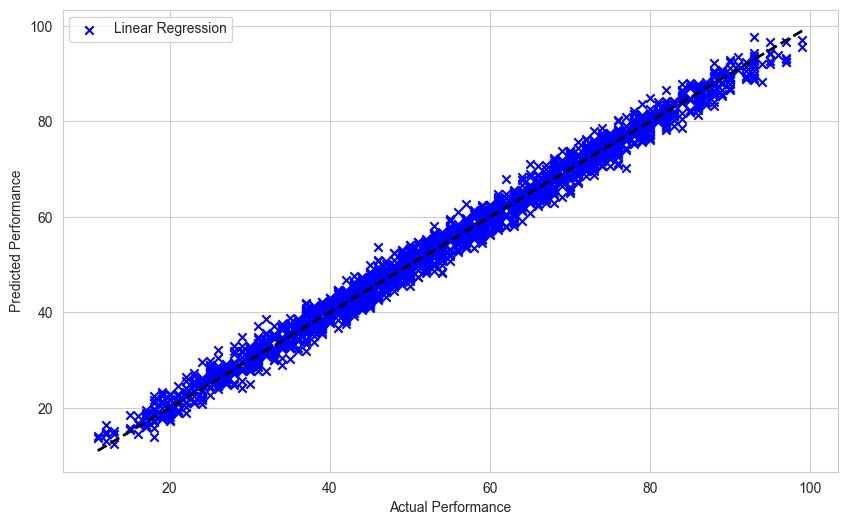

In [35]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, model_pred, color='blue', label='Linear Regression', marker='x')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Performance')
plt.ylabel('Predicted Performance')
plt.legend()
plt.show()

In [36]:
print('Linear Regression MAE:', mean_absolute_error(y_test, model_pred))
print('Linear Regression R2 Score:', r2_score(y_test, model_pred))
print('Linear Regression accuracy: ', model.score(x_test, y_test))

Linear Regression MAE: 1.612
Linear Regression R2 Score: 0.9889704960519785
Linear Regression accuracy:  0.9889832909573145


5. saving the code

In [37]:
import pickle

In [38]:
pickle.dump(model, open("model.pkl", "wb"))